In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from textblob import TextBlob

In [2]:
# Creating Data Frame
df_path = "./archive/Bitcoin_tweets.csv"
df = pd.read_csv(df_path)

df.head(10)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3170: DtypeWarning: Columns (5,6,7,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False
1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532,25483,False,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False
2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128.0,332,924,False,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",NaN,Twitter Web App,False
3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129,14,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False
5,ZerrBenz™ ⚔ ✪ 20732,"Bkk, Thailand",I'm a cat slave 🐱 Interested in Blockchain · T...,2010-01-12 07:00:04,742.0,716,2444,False,2021-02-10 23:53:30,💹 Trade #Crypto on #Binance \n\n📌 Enjoy #Cashb...,"['Crypto', 'Binance', 'Cashback']",Twitter Web App,False
6,Bitcoin-Bot,"Florida, USA",Bot to generate Bitcoin picture as combination...,2019-12-23 16:49:16,131.0,84,5728,False,2021-02-10 23:53:17,&lt;'fire' &amp; 'man'&gt;\n#Bitcoin #Crypto #...,"['Bitcoin', 'Crypto', 'BTC']",BTC_p_bot,False
7,Cryptocurrencies / EUR,NaN,Stay updated on the main cryptocurrencies of t...,2018-08-03 21:30:08,4052.0,1,9,False,2021-02-10 23:52:42,🔄 Prices update in $EUR (1 hour):\n\n$BTC - ...,NaN,Cryptocurrencies prices to EUR,False
8,Mikcoin,NaN,"Technical Analyst | Trader\n\nNo certainty, on...",2020-11-26 23:45:46,104.0,41,238,False,2021-02-10 23:52:25,#BTC #Bitcoin #Ethereum #ETH #Crypto #cryptotr...,"['BTC', 'Bitcoin', 'Ethereum', 'ETH', 'Crypto'...",Twitter Web App,False
9,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:52:08,.@Tesla’s #bitcoin investment is revolutionary...,"['bitcoin', 'crypto']",Twitter Web App,False


In [3]:
#Removing NaNs from Hashtag column
df. dropna(subset = ["hashtags"], inplace=True)
df.head(10)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False
1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532,25483,False,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False
3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129,14,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False
5,ZerrBenz™ ⚔ ✪ 20732,"Bkk, Thailand",I'm a cat slave 🐱 Interested in Blockchain · T...,2010-01-12 07:00:04,742.0,716,2444,False,2021-02-10 23:53:30,💹 Trade #Crypto on #Binance \n\n📌 Enjoy #Cashb...,"['Crypto', 'Binance', 'Cashback']",Twitter Web App,False
6,Bitcoin-Bot,"Florida, USA",Bot to generate Bitcoin picture as combination...,2019-12-23 16:49:16,131.0,84,5728,False,2021-02-10 23:53:17,&lt;'fire' &amp; 'man'&gt;\n#Bitcoin #Crypto #...,"['Bitcoin', 'Crypto', 'BTC']",BTC_p_bot,False
8,Mikcoin,NaN,"Technical Analyst | Trader\n\nNo certainty, on...",2020-11-26 23:45:46,104.0,41,238,False,2021-02-10 23:52:25,#BTC #Bitcoin #Ethereum #ETH #Crypto #cryptotr...,"['BTC', 'Bitcoin', 'Ethereum', 'ETH', 'Crypto'...",Twitter Web App,False
9,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:52:08,.@Tesla’s #bitcoin investment is revolutionary...,"['bitcoin', 'crypto']",Twitter Web App,False
10,@massumeh18 #RefinedWarrior #Activist,NOVA,Persistent. to the extreme... #FREEPALESTINE #...,2009-01-05 13:28:47,1159.0,2185,30852,False,2021-02-10 23:52:04,Annnd #btc #Bitcoin is headed even higher now....,"['btc', 'Bitcoin']",Twitter Web App,False
13,One Perspective,Market Place,It's all a market of markets.\n\nPast performa...,2018-01-09 21:49:45,668.0,1097,6853,False,2021-02-10 23:50:30,#Bitcoin #BTC $BTC $GBTC $RIOT $MARA $ETH $ETH...,"['Bitcoin', 'BTC', 'AAVE', 'DeFi', 'Crypto', '...",Twitter for Android,False


In [4]:
# How Many tweets?
print("Size of twwets: ", len(df))

Size of twwets:  89897


In [5]:
# Getting only the texts
df = df[['text']]
df.columns = ['tweets']

In [6]:
# Cleaning text 
def cleanText(twt):
    twt = re.sub("#bitcoin", 'bitcoin', twt) # removes the '#' from bitcoin
    twt = re.sub("#Bitcoin", 'Bitcoin', twt) # removes the '#' from Bitcoin
    twt = re.sub('#[A-Za-z0-9]+', '', twt) # removes any string with a '#'
    twt = re.sub('\\n', '', twt) # removes the '\n' string
    twt = re.sub('https:\/\/\S+', '', twt) # removes any hyperlinks
    return twt

In [7]:
# Clean Data Frame
df['cleaned_text'] = df['tweets'].apply(cleanText)
df

,tweets,cleaned_text
0,Blue Ridge Bank shares halted by NYSE after #b...,Blue Ridge Bank shares halted by NYSE after bi...
1,"😎 Today, that's this #Thursday, we will do a ""...","😎 Today, that's this , we will do a ""🎬 Take 2""..."
3,$BTC A big chance in a billion! Price: \487264...,$BTC A big chance in a billion! Price: \487264...
4,This network is secured by 9 508 nodes as of t...,This network is secured by 9 508 nodes as of t...
5,💹 Trade #Crypto on #Binance \n\n📌 Enjoy #Cashb...,💹 Trade on 📌 Enjoy 10% of the Trading fee📌 ...
...,...,...
106640,"Bitcoin - BTC\nPrice: $61,390.93\nChange in 1h...","Bitcoin - BTCPrice: $61,390.93Change in 1h: +0..."
106641,Market Id : BTC-AUD\nLast Price :79499.95\n24 ...,Market Id : BTC-AUDLast Price :79499.9524 Hour...
106642,"Bitcoin: $60,793.91\n -1.83% (-$1134.68)\nHigh...","Bitcoin: $60,793.91 -1.83% (-$1134.68)High: $6..."
106643,"#Bitcoin(#BTC) $60,885, -1.89% down\n#Dogecoin...","Bitcoin() $60,885, -1.89% down() $0.3053, 0.00..."


In [8]:
# TEXTBLOB library

# create a function to get subjectivity
def getSubjectivity(twt):
    return TextBlob(twt).sentiment.subjectivity

# create a function to get the polarity
def getPolarity(twt):
    return TextBlob(twt).sentiment.polarity

# create two new columns called "Subjectivity" & "Polarity"
df['subjectivity'] = df['cleaned_text'].apply(getSubjectivity)
df['polarity'] = df['cleaned_text'].apply(getPolarity)

In [9]:
# create a function that return results
def getSentiment(score):
    if score < 0:
        return "negative"
    elif score == 0:
        return "neutral"
    else:
        return "positive"

In [10]:
# create a column to store the text sentiment
df['sentiment'] = df['polarity'].apply(getSentiment)

df.head()

,tweets,cleaned_text,subjectivity,polarity,sentiment
0,Blue Ridge Bank shares halted by NYSE after #b...,Blue Ridge Bank shares halted by NYSE after bi...,0.1,0.0,neutral
1,"😎 Today, that's this #Thursday, we will do a ""...","😎 Today, that's this , we will do a ""🎬 Take 2""...",0.0,0.0,neutral
3,$BTC A big chance in a billion! Price: \487264...,$BTC A big chance in a billion! Price: \487264...,0.1,0.0,neutral
4,This network is secured by 9 508 nodes as of t...,This network is secured by 9 508 nodes as of t...,0.1,0.0,neutral
5,💹 Trade #Crypto on #Binance \n\n📌 Enjoy #Cashb...,💹 Trade on 📌 Enjoy 10% of the Trading fee📌 ...,0.5,0.4,positive


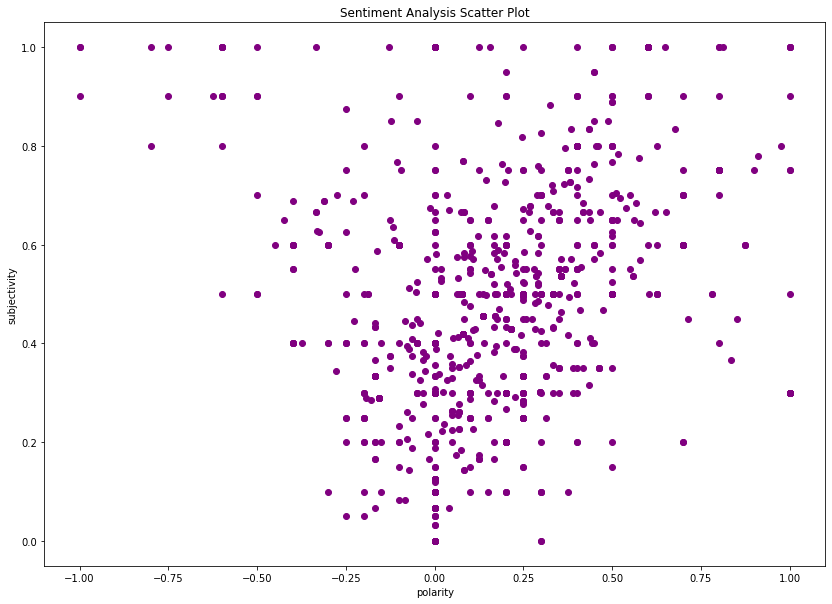

In [11]:
# create a scatter plot to show the subjectivity and the polarity
plt.figure(figsize=(14,10))

for i in range(0, 2000):
    plt.scatter(df["polarity"].iloc[[i]].values[0], df["subjectivity"].iloc[[i]].values[0], color="Purple")

plt.title("Sentiment Analysis Scatter Plot")
plt.xlabel('polarity')
plt.ylabel('subjectivity')
plt.show()

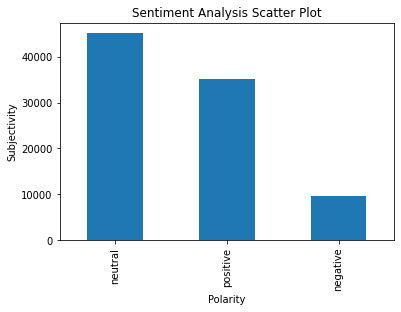

In [12]:
# Bar Chart for Positive Negative and Neutral predictions
df['sentiment'].value_counts().plot(kind="bar")
plt.title("Sentiment Analysis Scatter Plot")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=35141e0e-21d1-4e82-b75b-6e0fe3038914' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>